In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv ("test.csv")


In [3]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


# EDA of Train Dataset

In [5]:
# Checking null values
df_train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Observation
There are lots of missing values in the in the Product_Category_2 and Product_Category_3 columns.

In [6]:
# Checking the % of null values
df_train.isna().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [7]:
# CHecking the information of the dataframe

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Observation
So we can see Product_Category_2 and Product_Category_3 have are numerical columns having float64 datatype. Later on we will see what can we do with those columns after doing little bit more EDA

# Also we can see 'User_ID' and 'Product_ID' are irrelevant features so we can drop it.

In [8]:
# dropping irrelevant features

df_train = df_train.drop(['User_ID', 'Product_ID'], axis=1)
df_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [10]:
# Now we can get all the unique values in each columns 

for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Gender': ['F' 'M']
Unique values in column 'Age': ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique values in column 'Occupation': [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values in column 'City_Category': ['A' 'C' 'B']
Unique values in column 'Stay_In_Current_City_Years': ['2' '4+' '3' '1' '0']
Unique values in column 'Marital_Status': [0 1]
Unique values in column 'Product_Category_1': [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Unique values in column 'Product_Category_2': [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Unique values in column 'Product_Category_3': [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Unique values in column 'Purchase': [ 8370 15200  1422 ...   135   123   613]


# Observation:

1. We can see all the columns are Categorical columns except 'Purchase' column as it is a continous variable column. 
2. From here we can decide all other factors are effecting the 'Purchase' column as it is our Dependent feature and all other categories are independent

In [11]:
df_train['Product_Category_1'].value_counts()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [12]:
df_train['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [13]:
df_train['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

# Observation

1. we can see Product_category_1 is having 20 categories
2. we can see Product_category_2 is having 17 categories
3. we can see Product_category_2 is having 15 categories

# Decision:

1. As we can see Product_category_2 and Product_category_3 are having lots of missing values but Product_category_3 is having more missing values so we can drop that column.
2. We can go with random imputation for Product_Category_2 as it is having less missing values.

In [14]:
# Dropping the Product_Category_3 column

df_train = df_train.drop(['Product_Category_3'], axis=1)
df_train


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,137
550066,F,55+,1,C,2,0,20,NaN,365


# Now we will imputing random values to fill the missing values in product_category_2 with random imputation from the values present in the column.

In [15]:
import numpy as np

# Extract non-null values from the 'Product_Category_2' column
non_null_values = df_train['Product_Category_2'].dropna()

# Replace missing values with random imputation from non-null values
random_imputation = np.random.choice(non_null_values, size=df_train['Product_Category_2'].isnull().sum())
df_train.loc[df_train['Product_Category_2'].isnull(), 'Product_Category_2'] = random_imputation

# Verifying the result
print("Number of missing values after imputation:", df_train['Product_Category_2'].isnull().sum())


Number of missing values after imputation: 0


In [16]:
df_train['Product_Category_2'].value_counts()

Product_Category_2
8.0     93835
14.0    80319
2.0     72080
16.0    63019
15.0    55501
5.0     38323
4.0     37326
6.0     24018
11.0    20717
17.0    19465
13.0    15410
9.0      8303
12.0     8053
10.0     4463
3.0      4289
18.0     4030
7.0       917
Name: count, dtype: int64

In [17]:
df_train.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


# So far we have handled our all missing values
# Now we can do our EDA


In [19]:
data = df_train
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,8.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,2.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,8.0,368
550064,F,26-35,1,C,3,0,20,2.0,371
550065,F,26-35,15,B,4+,1,20,5.0,137
550066,F,55+,1,C,2,0,20,14.0,365


# Univariate Analysis:




<Axes: xlabel='Purchase', ylabel='Density'>

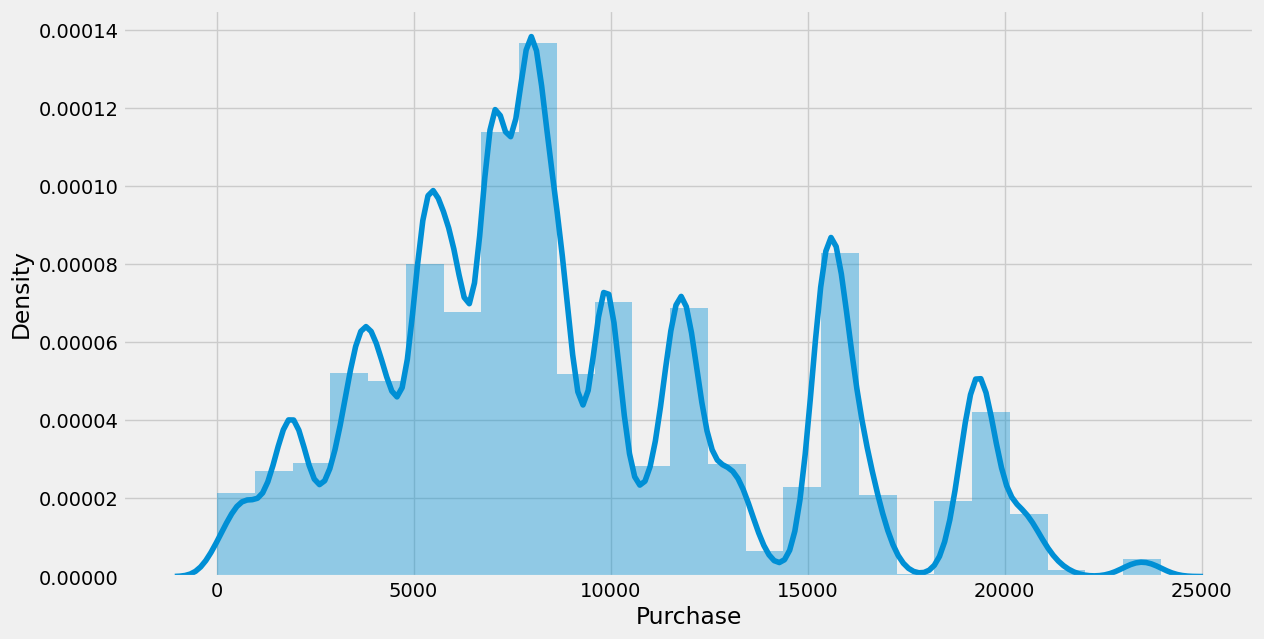

In [20]:
#distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(data['Purchase'],bins =25)




# Observation
1. We can see most of the people have purchased the product values in between 5000 to 10000.
2. There is a spike in the approximately 15000-18000 category, so people have purchased the product values between that also.
3. A small spike near 20000 price also indicated that people have less purchased the 20000 price point product

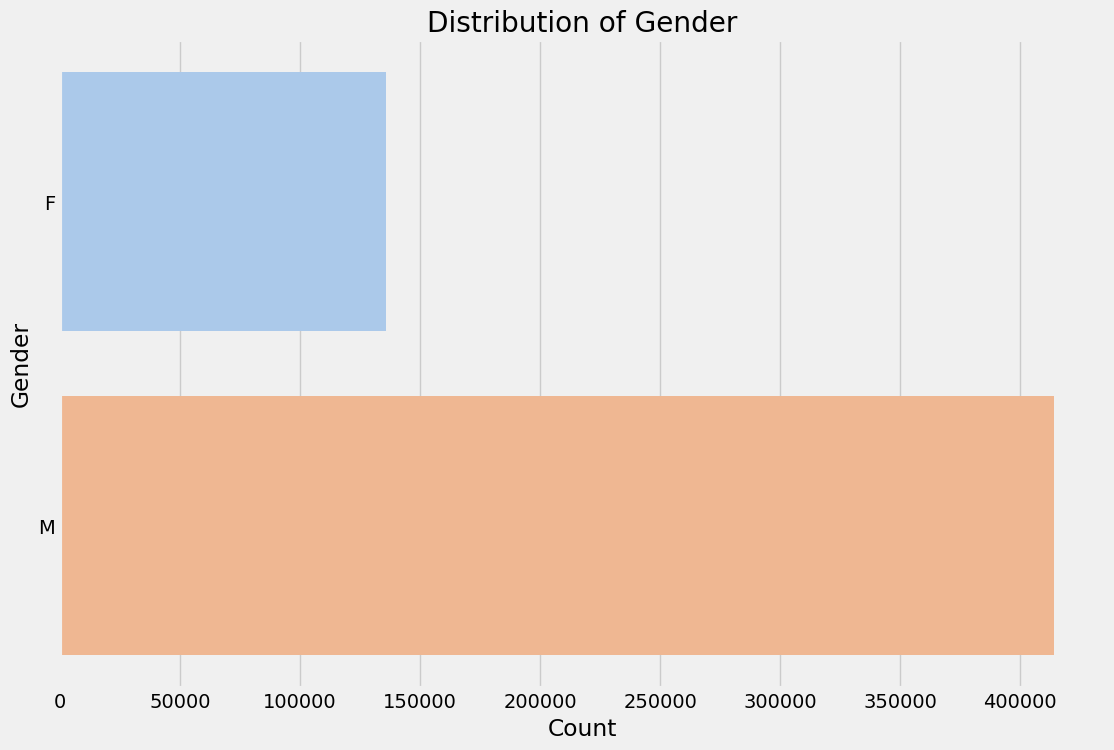

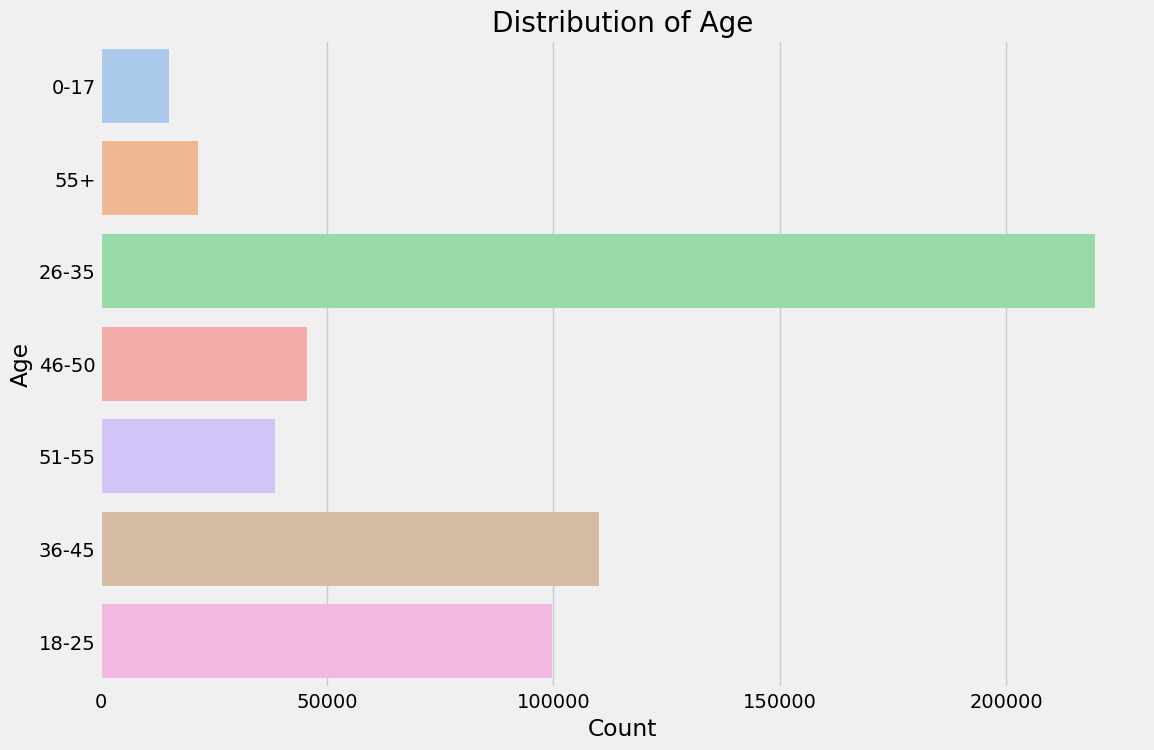

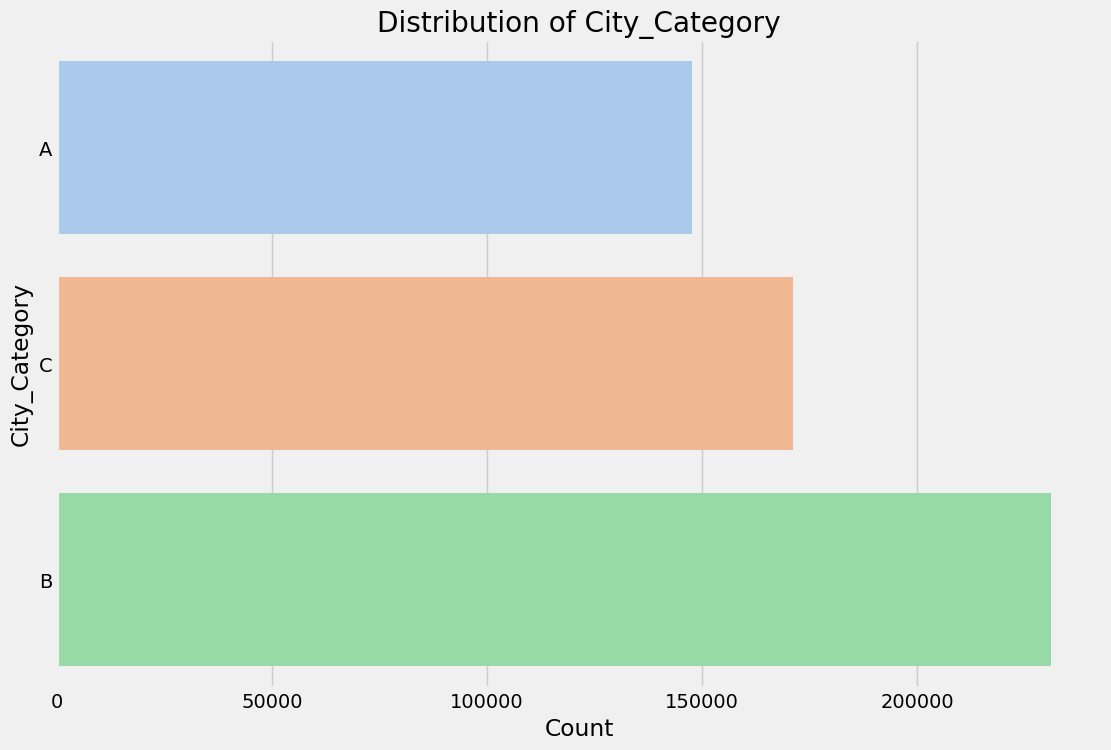

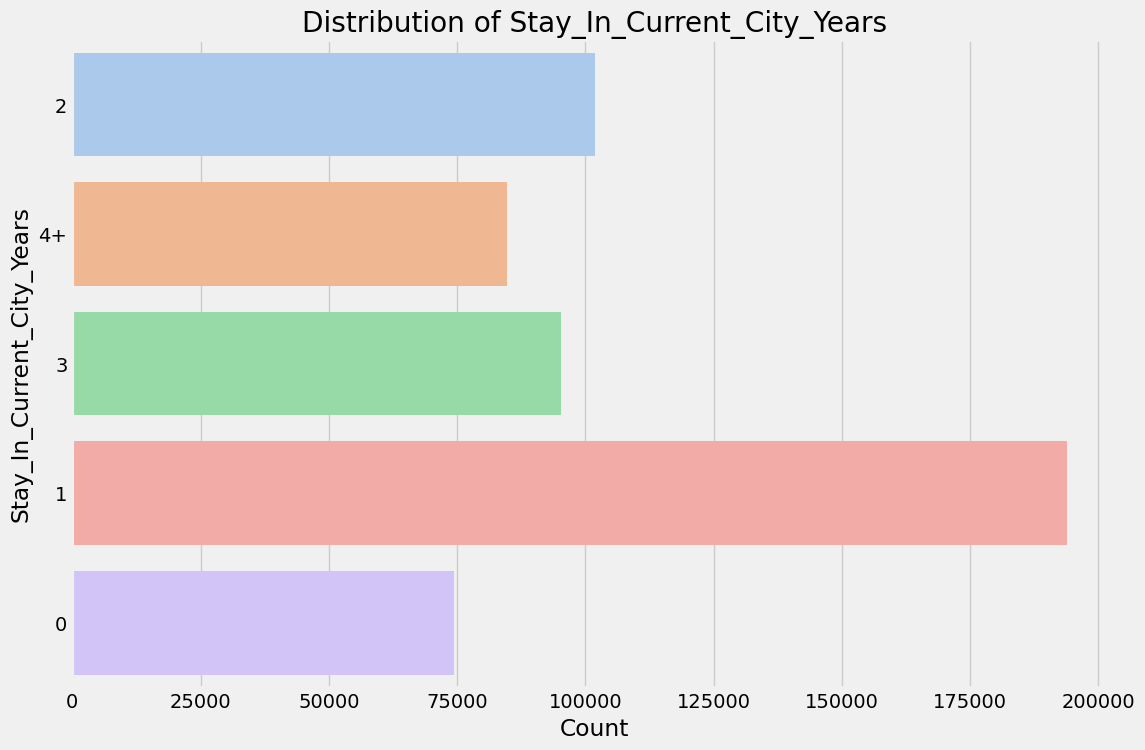

In [21]:
def plot_barplot(data, column):
    plt.figure(figsize=(12, 8))
    sns.countplot(data[column], palette='pastel')
    plt.ylabel(column)
    plt.xlabel("Count")
    plt.title(f"Distribution of {column}")
    plt.show()

for column in ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]:
    plot_barplot(data, column)


# Observation
1. Gender - We can see most the people are gender here to purchase any product and there is a huge imbalance.
2. Age - We can see most of the people are in the age group of 26-35, which indicates the late 20s to mid 30s people are more tends to purchased product.
    Then followed by the age group of 36-45 and then 18-25. 18-25 category spike indicates Young people are more tends to buy product during the sale.
3. City - B-Tier category city people are more tends to buy product during the sale.
4. Stay_In_Current_City_Years - We can see most of the people have stayed in the current city for 1 year and then 2 years and then 3 years and then 4+ years. Which shows people probabaly have recently relocated are more tends to buy product during sale.

In [22]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,8.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,2.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,8.0,368
550064,F,26-35,1,C,3,0,20,2.0,371
550065,F,26-35,15,B,4+,1,20,5.0,137
550066,F,55+,1,C,2,0,20,14.0,365


#----------------------------------------------------------------

In [23]:
occupation_distribution = data['Occupation'].value_counts()
fig = px.bar(x=occupation_distribution.index, y=occupation_distribution.values, title='Occupation Distribution')
fig.update_layout(xaxis_title='Occupation', yaxis_title='Count')
fig.show()

# Observation - 
We can see people who are purchasing product are mostly related to the occupation category 0,4,7 

In [24]:
marital_status_distribution = data['Marital_Status'].value_counts()
fig = px.pie(marital_status_distribution, values=marital_status_distribution.values, names=marital_status_distribution.index, title='Marital Status Distribution')
fig.show()

# Observation:
People who are unmarried are most likely to buy products during the sale. Although there is not a huge difference

In [25]:
product_category_1_distribution = data['Product_Category_1'].value_counts()
fig = px.bar(x=product_category_1_distribution.index, y=product_category_1_distribution.values, title='Product Category 1 Distribution')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
fig.show()

# Observation
We can see people who are purchasing product are mostly related to the product category 1,5,8

In [26]:
product_category_2_distribution = data['Product_Category_2'].value_counts()
fig = px.bar(x=product_category_2_distribution.index, y=product_category_2_distribution.values, title='Product Category 2 Distribution')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
fig.show()

# Observation:
We can see people who are purchasing product are mostly related to the product category 2,8,14

# Bivariate Analysis

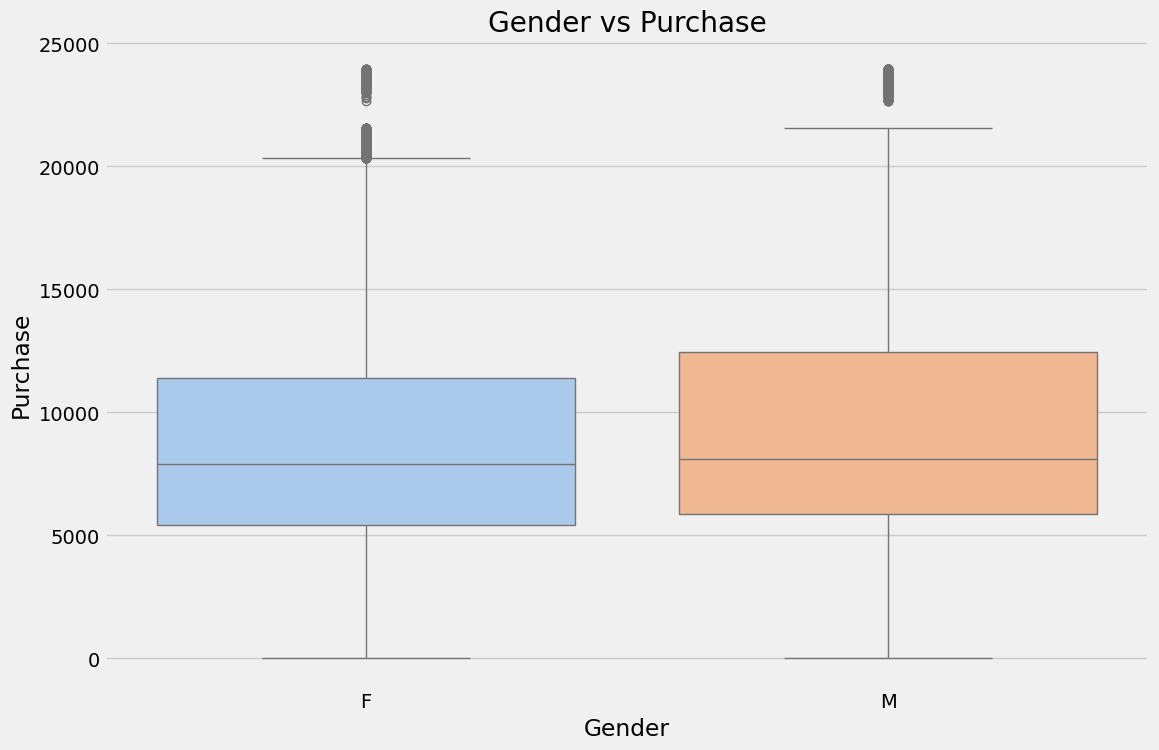

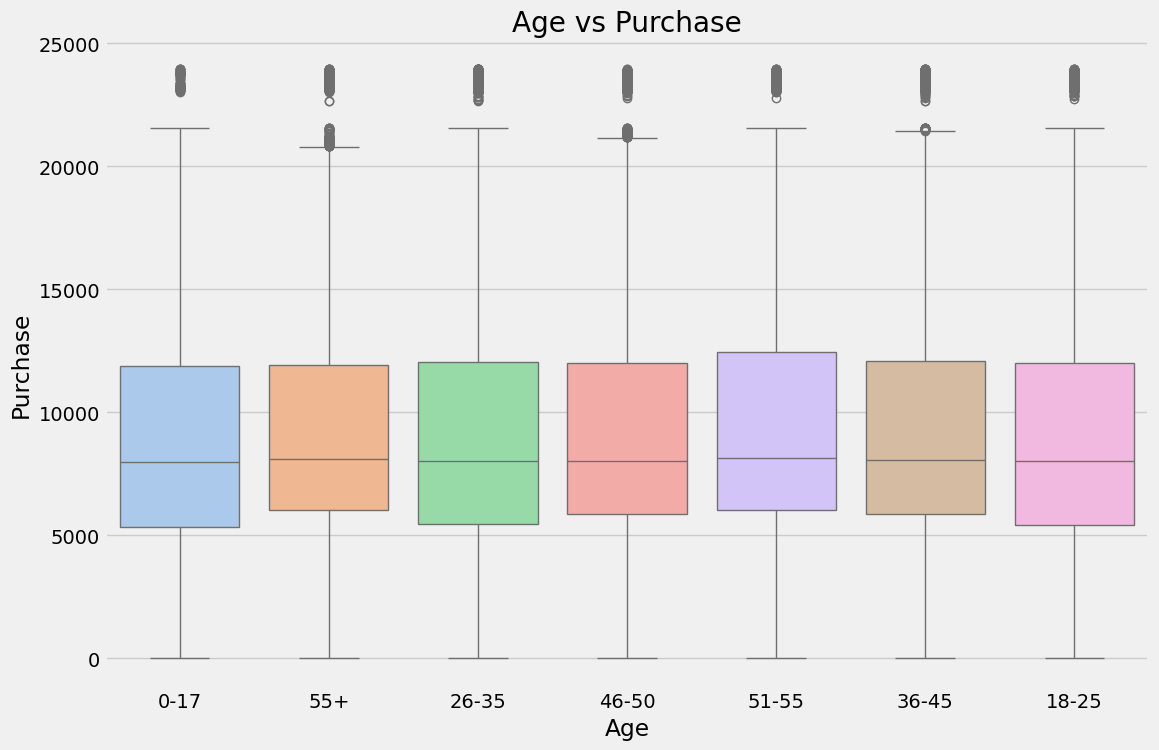

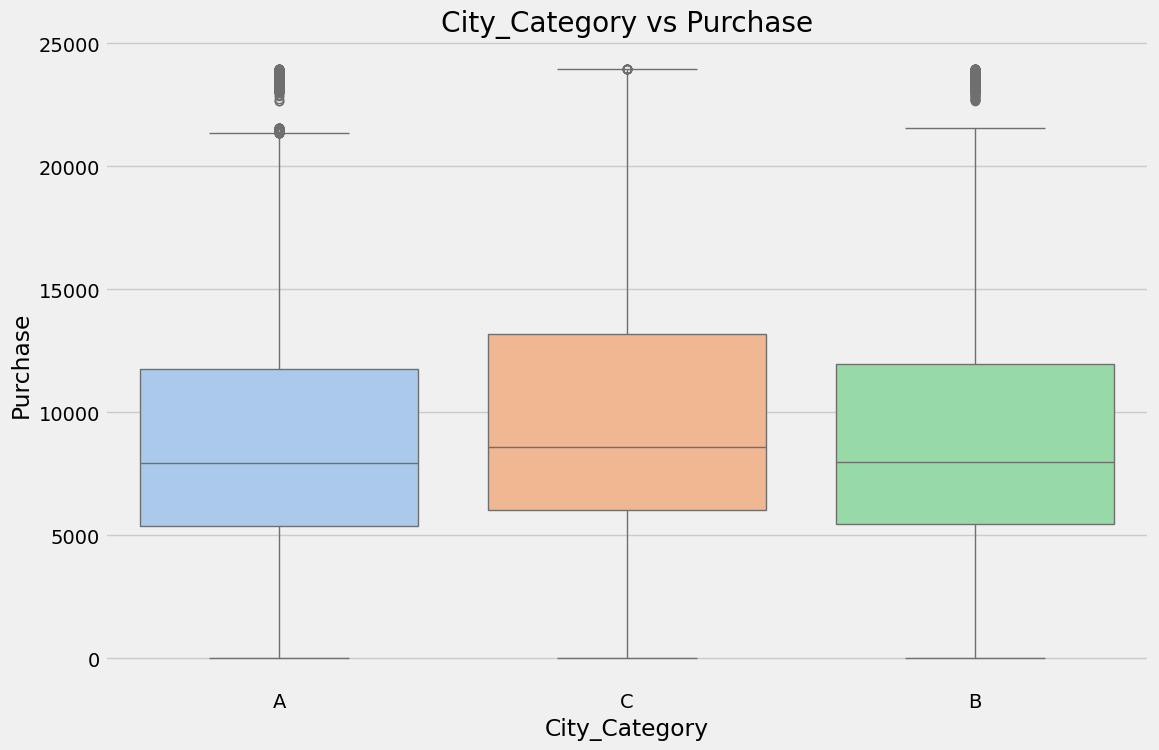

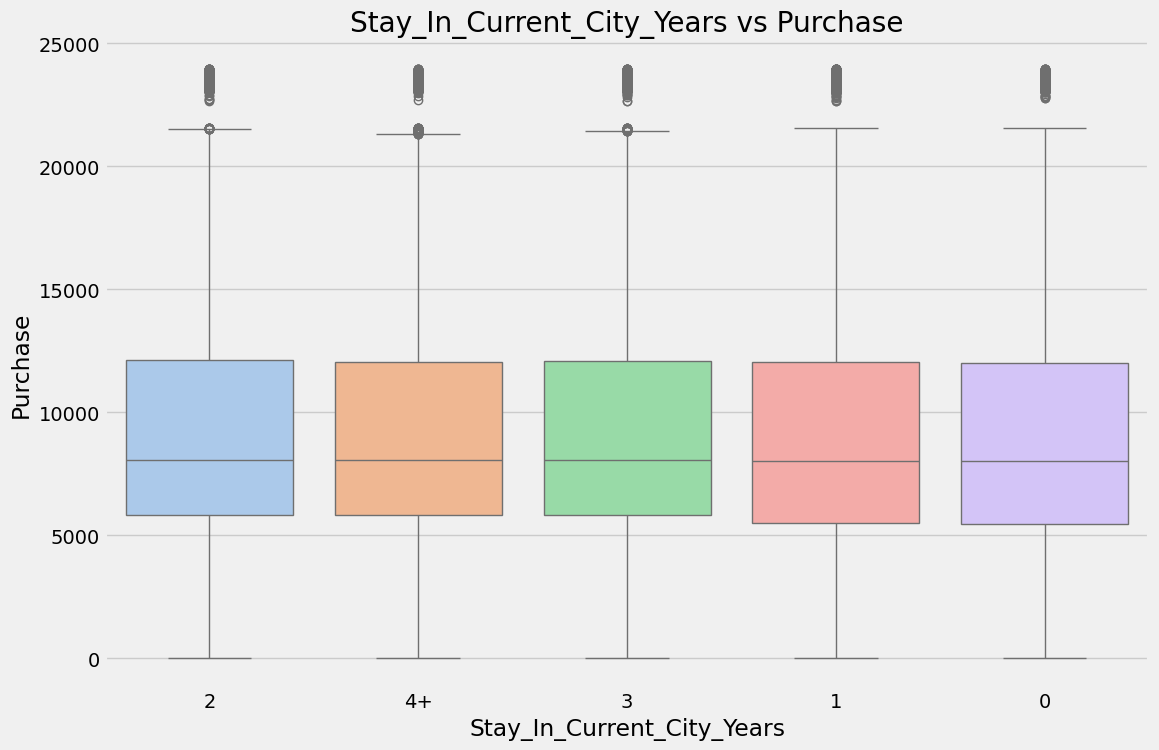

In [27]:
def plot_boxplot(data, x, y):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=x, y=y, data=data, palette='pastel')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.show()

for column in ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]:
    plot_boxplot(data, column, "Purchase")



# Observation

1. Gender vs Purchase-  We can see Male persons are more likely to buy little bit higher range products than Female
2. Age vs Purchase-  We can see the average or median purchase price is more or less equal to the all categories, but people are in 51-55 age group are more likely to buy little bit higher range products than others.
3. City_Category vs Purchase- Here we can see the average or median price is more for the C-tier city people and also more likely to buy the higher range products.
4. Stay_In_Current_City_Years vs Purchase- Here we can see the average purchase price doesn't vary with the staying time in the city

In [28]:
# Calculate average purchase amount by marital status
avg_purchase_marital = data.groupby('Marital_Status')['Purchase'].mean().reset_index()

# Plot using Plotly
fig = px.bar(avg_purchase_marital, x='Marital_Status', y='Purchase', 
             title='Average Purchase Amount by Marital Status', 
             labels={'Marital_Status': 'Marital Status', 'Purchase': 'Average Purchase Amount'},
             color='Marital_Status', 
             color_discrete_map={0: 'blue', 1: 'orange'})

# Update x-axis labels
fig.update_xaxes(tickvals=[0, 1], ticktext=['Single', 'Married'])

# Show plot
fig.show()

# Observation:

Average Purchase Amount during the sale is not effected by the Marital Status of the people

In [29]:
# Calculate average purchase amount by gender and product category
avg_purchase_gender_product = data.groupby(['Gender', 'Product_Category_1'])['Purchase'].mean().reset_index()

# Plot using Plotly
fig = px.bar(avg_purchase_gender_product, x='Product_Category_1', y='Purchase',
             color='Gender', barmode='group',
             title='Average Purchase Amount by Gender Across Product Categories',
             labels={'Product_Category_1': 'Product Category', 'Purchase': 'Average Purchase Amount', 'Gender': 'Gender'})

# Show plot
fig.show()

# Observation: 
1. Previous observation of Gender vs Purchase is True here and reflecting much more clear picture.
2. Average purchase amount during sale is not effected by the Gender of the people

In [30]:
# Calculate average purchase amount by gender and product category
avg_purchase_gender_product = data.groupby(['Gender', 'Product_Category_2'])['Purchase'].mean().reset_index()

# Plot using Plotly
fig = px.bar(avg_purchase_gender_product, x='Product_Category_2', y='Purchase',
             color='Gender', barmode='group',
             title='Average Purchase Amount by Gender Across Product Categories',
             labels={'Product_Category_2': 'Product Category', 'Purchase': 'Average Purchase Amount', 'Gender': 'Gender'})

# Show plot
fig.show()

# Observation: 
1. Previous observation of Gender vs Purchase is True here and reflecting much more clear picture.
2. Average purchase amount during sale is not effected by the Gender of the people
3. But here one extra addition is that average purchase amount of Male is tends to be little bit higher in most of the categories

In [31]:
# Calculate counts of Product_Category_1 by Gender
product_category_gender_counts = data.groupby(['Product_Category_1', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly
fig = px.bar(product_category_gender_counts, x='Product_Category_1', y='Count', color='Gender',
             title='Product_Category_1 by Gender',
             labels={'Product_Category_1': 'Product Category 1', 'Count': 'Count', 'Gender': 'Gender'},
             barmode='group')

# Show plot
fig.show()


# Observation:
1. Huge difference in the Purchase amount during sale vs Gender in Product_Category_1
2. Make are more likely to spend much much higher price in the Product_Category_1 

In [32]:
# Calculate counts of Product_Category_1 by Gender
product_category_gender_counts = data.groupby(['Product_Category_2', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly
fig = px.bar(product_category_gender_counts, x='Product_Category_2', y='Count', color='Gender',
             title='Product_Category_2 by Gender',
             labels={'Product_Category_2': 'Product Category 2', 'Count': 'Count', 'Gender': 'Gender'},
             barmode='group')

# Show plot
fig.show()

# Observation:
1. Huge difference in the Purchase amount during sale vs Gender in Product_Category_2
2. Make are more likely to spend much much higher price in the Product_Category_2 as see we same in the Product_Category_1

# Correlation Analysis

In [33]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Handle non-numeric values (for example, you can drop these columns)
data_numeric = data.drop(columns=non_numeric_columns)

# Generate the correlation heatmap
fig = px.imshow(data_numeric.corr(), 
                labels=dict(color="Correlation"), 
                x=data_numeric.corr().columns, 
                y=data_numeric.corr().columns, 
                color_continuous_scale='RdBu',
                zmin=-1, zmax=1)
fig.update_layout(title='Correlation Heatmap',
                  width=800, height=600)
fig.show()


# Observation
1. Product_Category_1 and Product_Category_2 are highly correlated
2. Occupation and Marital_Status are not correlated
3. Occupation and Product_Category_1 not correlated
4. Occupation and Product_Category_2 not correlated
5. Marital_Status and Product_Category_1 are not correlated
6. Marital_Status and Product_Category_2 are not correlated
7. Purchase & Product_Category_1 & Product_Category_2 are negative related.